<a href="https://colab.research.google.com/github/wudiubaobao/assessment-2/blob/main/Development_Report_assignmennt3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction:**

Working in a group of three, analyse the Australian Energy dataset using Python in Google Colab notebooks to understand SQLite databases, data exploration, data visualization, and applying industry best practices in programming.

Create two notebooks:

**1. an analysis and business report** (which includes code, analysis, and discussion)

 **2. a** **development notebook**, which includes pseudocode, testing, and any other industry best practice not observable from the business report.

## **Overview**
This report provides a comprehensive analysis of energy use in Australia, categorized by state, fuel type, and year. The data extracted from the AUS-energy_sqlite3.db database offers valuable insights into the consumption patterns of various energy sources, including coal, oil, gas, and renewables. Furthermore, the report examines energy intensity, which is defined as the amount of energy consumed per unit of gross state product (GSP), to evaluate the energy efficiency of each state. This article examines the significant trends and patterns in energy use throughout Australia, offering a comprehensive review of how different states employ diverse energy sources and their effectiveness in doing so. By comprehending these factors, individuals or groups with an interest in the matter can make well-informed choices to improve energy policies, encourage sustainable methods, and allocate resources towards innovations that contribute to a more environmentally friendly and productive energy environment.

## **Key points of analysis**
This report analyzes the utilization of coal, oil, gas, and renewable energy in Australia, categorized by state and year. In order to evaluate energy efficiency, we also examine energy intensity, which is the measure of energy consumed per unit of gross state product (GSP).

1. state.
2. fuel type
3. year
4. total energy consumption
5. Energy intensity
6. Amount of energy consumed per unit of GSP

# **Problem Statement**

Access the file AUS-energy_sqlite3.db, which contains comprehensive statistics on energy usage in Australia, including coal, oil, gas, and renewable energy sources. Your objective is to examine the overall energy usage documented in this dataset using multiple criteria. Please generate a graph illustrating the comprehensive energy usage for each state in Australia, categorized by fuel and type. Additionally, it is necessary to examine and visually represent the energy intensity, which refers to the amount of energy consumed per unit of gross state product (GSP), for every state and year. The objective of this visualization is to provide you with a full comprehension of the overall energy consumption and energy efficiency categorized by fuel type for all states in Australia. The purpose of this is to assist you in making judgments by utilizing this data.

# **Detailed Algorithm**

* **Upload and connect to Database**

  load AUS-energy_sqlite3.db.
* **Load Data**

  To make sure the right dataset is being worked with, provide precise table names or, if appropriate, filtering criteria.
* **Data Exploration**

  Outline the techniques employed for data visualization and the precise elements of the data to be examined, including outliers and particular data types, in order to conduct a comprehensive initial evaluation.

* **Data Cleansing**

  Enumerate methodologies for detecting unsuitable or nonsensical data and strategies for managing these concerns. For example, employing imputation algorithms or establishing criteria for removal, in order to uphold data quality.
* **Visual Data Analysis**

  Describe the specific sorts of plots or statistical tests that are employed to verify the integrity of data after cleaning, hence confirming the validity of the results and the cleanliness of the data.

* **Iterative Data Exploration**

  Mention the use of script automation to streamline repetitive tasks and improve efficiency and consistency in data organization.

* **Detailed Data Analysis**

  Provide clarification on the analytical procedures and their goal by mentioning the precise statistical models or techniques utilized in these analyses, as well as any hypothesis tested.

*   Data Analysis GroupA 1 : Compute and visualize the total energy consumption for each state.
*   Data Analysis GroupA 2 : Compute and visualize the total energy consumption by fuel type.
*   Data Analysis GroupB 3 : Analyse and visualise the total energy consumption for each state, broken down by fuel type.
*   Data Analysis GroupC 4 :Analyse the energy intensity, defined as energy consumption per unit of GSP, for each state annually and chart these figures.





# Retrieve database

## Input

Import the AUS-energy_sqlite3.db file, which contains year-by-year statistics on Australia's energy consumption of coal, oil, gas, and renewables.

## Output

Create a graph illustrating the aggregate energy consumption of coal (in petajoules), oil (in petajoules), gas (in petajoules), and renewables (in petajoules) in Australia, categorized by state and fuel type.

# Import libraries

First, we uploaded the original database, “AUS_energy_sqlite3.db”. Then we import the four libraries we need to work with the code. The four libraries are shown below.

1. Sqlite3: A fast and lightweight file-based relational database system
2. Pandas: A Python library for working with and analyzing data, providing a useful data structure called a dataframe.
3. Numpy: A Python library for working quickly with arrays and linear algebra.
4. Matplotlib.pyplot: A Python library for creating charts, graphs, and other 2D data visualizations.

In [ ]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset

Loading the data -
connect to the provided SQLite database using the SQLite3 library

# Data Exploration

Prior to analyzing a given dataset, it is necessary to perform data cleansing. The concept is as follows:

1. Database exploration: Determine the number of tables in this database and retrieve the name of each table.
2. Inspecting the data structure: Determine the overall quantity of data, the names of the data fields, and the data kinds.
3. Identifying unsuitable data: This includes identifying duplicate data, unexpected forms or specifications, and outliers.
4. Data cleansing involves removing duplicate and unsuitable data.

  In the end, the cleaned data is stored in a fresh database.

# Load the database into a Pandas Dataframe

To print out all the table names and find out how many stories there in AUS_energy_sqlite3.db.

In [ ]:
# Connect to 'AUS_energy_sqlite.3.db' database
conn = sqlite3.connect('AUS_energy_sqlite3.db')
# Create a cursor object
cursor = conn.cursor()

# Query to retreive table names
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")

# Fatch all table names
tables = cursor.fetchall()

# Print the table names
for table in tables:
    print(table[0])

# Close the connection when done
conn.close()

AUS_energy


Retrieve the column names from a specified table (AUS_energy), and print those column names.

In [ ]:
# Connect to the sqlite database
conn = sqlite3.connect('AUS_energy_sqlite3.db')
# Create a cursor object
cursor = conn.cursor()

# Specify the table name for which you want to retrieve column names
table_name = 'AUS_energy'

# Query to retrieve column names
cursor.execute("PRAGMA table_info({})".format(table_name))

# Fetch all column names
columns = cursor.fetchall()

# Print the column names
for column in columns:
    print(column[1])

# Close the connection when done
conn.close()

Year
State
Coal (PJ)
Oil (PJ)
Gas (PJ)
Renewables (PJ)
Population
GSP ($ million)


In [ ]:
conn = sqlite3.connect('AUS_energy_sqlite3.db')
# Create a cursor object
cursor = conn.cursor()

table_name = 'AUS_energy'
# sql syntax select (column list) from (table name)
cursor.execute("SELECT * FROM AUS_energy")
rows = cursor.fetchall()

# Close the connection when done
conn.close()
rows

[('2008-09', 'WA', 132.9, 294.3, 474.7, 15.6, 2240250, 244695),
 ('2008-09', 'NSW', 800.9, 587.5, 131.6, 54.7, 7408540, 530532),
 ('2008-09', 'VIC', 695.3, 432.9, 273.5, 33.6, 5371934, 368579),
 ('2008-09', 'QLD', 629.2, 469.5, 187.9, 77.4, 4328771, 284526),
 ('2008-09', 'SA', 80.2, 120.2, 134.0, 21.2, 1608902, 100174),
 ('2008-09', 'TAS', 12.4, 41.6, 11.2, 37.1, 504353, 28165),
 ('2008-09', 'NT', '', 54.8, 39.9, 0.4, 226027, 19562),
 ('2009-10', 'WA', 125.6, 290.0, 474.9, 14.6, 2290845, 259326),
 ('2009-10', 'NSW', 771.8, 638.9, 148.7, 63.8, 7506058, 539670),
 ('2009-10', 'VIC', 688.7, 448.4, 263.5, 36.0, 5461101, 372276),
 ('2009-10', 'QLD', 547.5, 466.9, 195.8, 107.4, 4404744, 290556),
 ('2009-10', 'SA', 79.7, 120.5, 119.5, 20.4, 1627322, 102303),
 ('2009-10', 'TAS', 11.5, 41.5, 13.6, 40.0, 508847, 28402),
 ('2009-10', 'NT', '', 51.9, 42.0, 0.5, 229778, 19469),
 ('2010-11', 'WA', 130.6, 341.5, 494.9, 15.3, 2353409, 271336),
 ('2010-11', 'NSW', 732.2, 685.0, 146.5, 68.6, 7586514, 550

# Viewing the data structure

In [ ]:
# Use Pandas to load the query results into data frames
# Given dataset
data = rows

# Define column names
columns = ['Year','State','Coal(PJ)','Oil(PJ)','Gas(PJ)','Renewables(PJ)','Population','GSP($ milion)']

# Create a list of dictionaries where each dictionary represents a row of data
data_dict = [{columns[i]: row[i] for i in range(len(columns))} for row in data]

# Create a Pandas Dataframe
df = pd.DataFrame(data_dict)

# Print the DataFrame
df

,Year,State,Coal(PJ),Oil(PJ),Gas(PJ),Renewables(PJ),Population,GSP($ milion)
0,2008-09,WA,132.9,294.3,474.7,15.6,2240250,244695
1,2008-09,NSW,800.9,587.5,131.6,54.7,7408540,530532
2,2008-09,VIC,695.3,432.9,273.5,33.6,5371934,368579
3,2008-09,QLD,629.2,469.5,187.9,77.4,4328771,284526
4,2008-09,SA,80.2,120.2,134.0,21.2,1608902,100174
5,2008-09,TAS,12.4,41.6,11.2,37.1,504353,28165
6,2008-09,NT,,54.8,39.9,0.4,226027,19562
7,2009-10,WA,125.6,290.0,474.9,14.6,2290845,259326
8,2009-10,NSW,771.8,638.9,148.7,63.8,7506058,539670
9,2009-10,VIC,688.7,448.4,263.5,36.0,5461101,372276


Display the data overview and identify that the database contains 98 rows and 8 columns.

Currently, I would want a more detailed examination of the initial and final 10 rows.

In [ ]:
# Look at the first 10 rows of the dataframe
df.head(10)

,Year,State,Coal(PJ),Oil(PJ),Gas(PJ),Renewables(PJ),Population,GSP($ milion)
0,2008-09,WA,132.9,294.3,474.7,15.6,2240250,244695
1,2008-09,NSW,800.9,587.5,131.6,54.7,7408540,530532
2,2008-09,VIC,695.3,432.9,273.5,33.6,5371934,368579
3,2008-09,QLD,629.2,469.5,187.9,77.4,4328771,284526
4,2008-09,SA,80.2,120.2,134.0,21.2,1608902,100174
5,2008-09,TAS,12.4,41.6,11.2,37.1,504353,28165
6,2008-09,NT,,54.8,39.9,0.4,226027,19562
7,2009-10,WA,125.6,290.0,474.9,14.6,2290845,259326
8,2009-10,NSW,771.8,638.9,148.7,63.8,7506058,539670
9,2009-10,VIC,688.7,448.4,263.5,36.0,5461101,372276


In [ ]:
# Look at the last 10 rows of the dataframe
df.tail(10)

,Year,State,Coal(PJ),Oil(PJ),Gas(PJ),Renewables(PJ),Population,GSP($ milion)
88,2020-21,SA,25.4,143.3,92.2,44.3,1802601,118271
89,2020-21,TAS,8.1,40.0,7.3,43.4,567239,35195
90,2020-21,NT,,37.6,106.2,1.5,248151,24890
91,2021-22,WA,121.1,422.5,673.1,41.2,2789148,377257
92,2021-22,NSW,534.6,547.2,145.3,125.4,8622575,706003
93,2021-22,VIC,410.7,410.0,237.5,105.2,6625964,500900
94,2021-22,QLD,485.6,504.7,305.7,143.0,5320496,384508
95,2021-22,SA,25.9,141.6,80.2,48.3,1821200,124252
96,2021-22,TAS,8.8,39.9,7.1,48.1,571013,36701
97,2021-22,NT,,37.6,110.6,1.6,250219,26058


In [ ]:
# General overview of the structure and content of dataframes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            98 non-null     object 
 1   State           98 non-null     object 
 2   Coal(PJ)        98 non-null     object 
 3   Oil(PJ)         98 non-null     float64
 4   Gas(PJ)         98 non-null     float64
 5   Renewables(PJ)  98 non-null     float64
 6   Population      98 non-null     int64  
 7   GSP($ milion)   98 non-null     int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 6.2+ KB


The main data types are integers and floats, and there are values that show up as having no data,
so we'll check them again in detail.

In [ ]:
# Outputs summary information about dataframe
df.describe()

,Oil(PJ),Gas(PJ),Renewables(PJ),Population,GSP($ milion)
count,98.000000,98.000000,98.000000,9.800000e+01,98.000000
mean,317.653061,204.587755,51.580612,3.424330e+06,266337.000000
std,229.318224,179.205651,38.383143,2.769970e+06,209376.485897
min,33.400000,6.600000,0.400000,2.260270e+05,19469.000000
25%,54.350000,81.675000,24.025000,5.502752e+05,33440.000000
50%,379.100000,144.700000,42.500000,2.548325e+06,301927.000000
75%,507.675000,263.600000,72.600000,5.622772e+06,390060.250000
max,687.400000,692.600000,143.000000,8.622575e+06,706003.000000


In [ ]:
df.dtypes

Year               object
State              object
Coal(PJ)           object
Oil(PJ)           float64
Gas(PJ)           float64
Renewables(PJ)    float64
Population          int64
GSP($ milion)       int64
dtype: object

# Discovering inappropriate data

In [ ]:
# Check for duplicates based on all columns
df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
50    False
51    False
52    False
53    False
54    False
55    False
56    False
57    False
58    False
59    False
60    False
61    False
62    False
63    False
64    False
65    False
66    False
67    False
68    False
69    False
70    False
71    False
72    False
73    False
74    False
75    False
76    False
77    False
78    False
79    False
80    False
81    False
82    False
83  

In [ ]:
# Check for missing values
df.isnull().head()

,Year,State,Coal(PJ),Oil(PJ),Gas(PJ),Renewables(PJ),Population,GSP($ milion)
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False


In [ ]:
# Check for missing values in each row
null_records = df.isnull().any(axis=1)
df[null_records]

,Year,State,Coal(PJ),Oil(PJ),Gas(PJ),Renewables(PJ),Population,GSP($ milion)


Checks for missing (null) values and then displays the rows that contain the missing values.

In [ ]:
# Check for missing data in the DataFrame
#missing_data = df.isnull().sum()
missing_data = (df== '').sum()

# Print the number of missing values in each column
print("Number of missing values in each column:")
print(missing_data)


Number of missing values in each column:
Year               0
State              0
Coal(PJ)          14
Oil(PJ)            0
Gas(PJ)            0
Renewables(PJ)     0
Population         0
GSP($ milion)      0
dtype: int64


There are no duplicate values, but there are 14 instances where the value for Coal(PJ) is empty.

In [ ]:
# Set pandas options to display all rows and columns
pd.set_option('display.max_rows', None) # Show all rows
pd.set_option('display.max_columns',None) # Show all columns

# Print the entire DataFrame
print(df)


       Year State Coal(PJ)  Oil(PJ)  Gas(PJ)  Renewables(PJ)  Population  \
0   2008-09    WA    132.9    294.3    474.7            15.6     2240250   
1   2008-09   NSW    800.9    587.5    131.6            54.7     7408540   
2   2008-09   VIC    695.3    432.9    273.5            33.6     5371934   
3   2008-09   QLD    629.2    469.5    187.9            77.4     4328771   
4   2008-09    SA     80.2    120.2    134.0            21.2     1608902   
5   2008-09   TAS     12.4     41.6     11.2            37.1      504353   
6   2008-09    NT              54.8     39.9             0.4      226027   
7   2009-10    WA    125.6    290.0    474.9            14.6     2290845   
8   2009-10   NSW    771.8    638.9    148.7            63.8     7506058   
9   2009-10   VIC    688.7    448.4    263.5            36.0     5461101   
10  2009-10   QLD    547.5    466.9    195.8           107.4     4404744   
11  2009-10    SA     79.7    120.5    119.5            20.4     1627322   
12  2009-10 

# Using Gen AI to develop the code

''' **Gen AI prompt**: how to handle of empty values of 'Coal(PJ)'?






**Gen AI response**: If there are empty values, you'll need to decide how to handle them. Here are some common options:

***Drop rows with empty values***: You can use the .dropna() method to remove rows with missing values in any column, or you can specify the column name ('Coal(PJ)' in your case) as an argument.

***Impute empty values***: You can estimate the empty values based on other columns in your DataFrame using techniques like mean/median imputation or more sophisticated methods.

***Fill with Median***: You can fill empty values with the median of the column. This approach is suitable when the empty values are randomly distributed and the column follows a normal distribution. median_coal = df['Coal(PJ)'].median() df['Coal(PJ)'].fillna(median_coal, inplace=True)

```python
# Fill empty values in 'Coal(PJ)' with the median of the column
median_coal = df_map['Coal(PJ)'].median()
df_map['Coal(PJ)'].fillna(median_coal, inplace=True)
```

### ***Why I choice median for filling empty value*** :
When data is sorted in ascending order, the value that falls in the middle is called the median. Since the median is unaffected by extreme numbers, it is a more reliable method than the mean for expressing the data's central trend. Furthermore, if there are more empty values than half of the total number of data points, the median cannot be determined. The mean value, which is greatly influenced by the extreme values, may not correctly reflect the underlying central tendency of the data if there are extreme values present. Furthermore, the mean value may be biased if there are many empty values, which means that the mean value of the data with empty values may differ from the mean value of the complete data. For these reasons, if your data contains extreme values or a large number of empty values, we advise utilizing the median. In order to calculate the total energy consumption by fuel type, we thought it would be more accurate to compare via median rather than removing values.

**Gen AI Response Effectives**: Before visualizing the total energy consumption, we need to handle empty values in the 'Coal (PJ)' column. we can fill in the empty values with an appropriate value, such as the median of the column.

**Modification Needed**: The error message indicates that there's a problem with computing the mean of the 'Coal(PJ)' column, likely because some values in the column are of string type, which cannot be directly used in arithmetic operations. To fix this error, you need to ensure that all values in the 'Coal(PJ)' column are numeric before calculating the mean. You can do this by converting the column to a numeric data type using pd.to_numeric(). '''

In [ ]:
# Convert 'Coal(PJ)' column to numeric, coercing errors to NaN
df['Coal(PJ)'] = pd.to_numeric(df['Coal(PJ)'], errors='coerce')

# Calculate the median of the 'Coal(PJ)' column
median_coal = df['Coal(PJ)'].median()

# Fill missing values in the 'Coal(PJ)' column with the mean value
df['Coal(PJ)'].fillna(median_coal, inplace=True)

# Verify that missing values have been filled
print("Number of missing values in 'Coal(PJ)' column after filling:", df['Coal(PJ)'].isnull().sum())


Number of missing values in 'Coal(PJ)' column after filling: 0


Once the 'Coal(PJ)' column has been converted to a numerical value, find the column's median and use that value to fill in the missing values in the 'Coal(PJ)' column.

In [ ]:
# confirm the no missing values
print(df['Coal(PJ)'].unique())

[132.9 800.9 695.3 629.2  80.2  12.4 278.3 125.6 771.8 688.7 547.5  79.7
  11.5 130.6 732.2 681.2 497.2  72.6  10.1 125.  692.7 705.7 481.5  60.9
   8.9 129.8 643.  622.  473.4  50.7  12.  136.1 603.5 605.6 442.9  46.7
  11.  127.6 587.8 641.2 485.3  54.   11.3 136.4 620.9 617.4 517.8  52.6
   9.7 145.9 625.9 577.3 544.2  26.1  10.7 136.2 636.7 467.4 570.6  25.9
  10.5 126.8 640.3 444.1 554.2  26.3  10.  119.5 606.6 423.2 524.4  24.7
   8.3 114.3 579.8 427.7 506.1  25.4   8.1 121.1 534.6 410.7 485.6   8.8]


In [ ]:
# Set pandas options to display all rows and columns
pd.set_option('display.max_rows', None) # Show all rows
pd.set_option('display.max_columns',None) # Show all columns

# Print the entire DataFrame
print(df)

       Year State  Coal(PJ)  Oil(PJ)  Gas(PJ)  Renewables(PJ)  Population  \
0   2008-09    WA     132.9    294.3    474.7            15.6     2240250   
1   2008-09   NSW     800.9    587.5    131.6            54.7     7408540   
2   2008-09   VIC     695.3    432.9    273.5            33.6     5371934   
3   2008-09   QLD     629.2    469.5    187.9            77.4     4328771   
4   2008-09    SA      80.2    120.2    134.0            21.2     1608902   
5   2008-09   TAS      12.4     41.6     11.2            37.1      504353   
6   2008-09    NT     278.3     54.8     39.9             0.4      226027   
7   2009-10    WA     125.6    290.0    474.9            14.6     2290845   
8   2009-10   NSW     771.8    638.9    148.7            63.8     7506058   
9   2009-10   VIC     688.7    448.4    263.5            36.0     5461101   
10  2009-10   QLD     547.5    466.9    195.8           107.4     4404744   
11  2009-10    SA      79.7    120.5    119.5            20.4     1627322   

Verify that the dataframe's rows and columns are all visible and that any empty spaces are filled in.

# Data cleasing

In [ ]:
# Grouping by state
grouped_by_state = df.groupby('State')

for name, group in grouped_by_state:
  # Print group information (name is the state)
  print(f"State: {name}")
  print(group)  # Print the entire DataFrame for this state
  print("-"*20)  # Separator between states

State: NSW
       Year State  Coal(PJ)  Oil(PJ)  Gas(PJ)  Renewables(PJ)  Population  \
1   2008-09   NSW     800.9    587.5    131.6            54.7     7408540   
8   2009-10   NSW     771.8    638.9    148.7            63.8     7506058   
15  2010-11   NSW     732.2    685.0    146.5            68.6     7586514   
22  2011-12   NSW     692.7    687.4    142.1            71.1     7680783   
29  2012-13   NSW     643.0    677.4    157.4            70.9     7787289   
36  2013-14   NSW     603.5    666.6    167.0            72.8     7897152   
43  2014-15   NSW     587.8    621.4    163.5            71.0     8011981   
50  2015-16   NSW     620.9    633.6    164.8            82.4     8135962   
57  2016-17   NSW     625.9    652.6    143.6            84.5     8270362   
64  2017-18   NSW     636.7    672.4    144.1            86.6     8380557   
71  2018-19   NSW     640.3    665.0    139.2            90.4     8482478   
78  2019-20   NSW     606.6    611.4    141.9            95.6    

Form a Groupthe DataFrame df by object to group by the 'State' column.

In [ ]:
# Grouping by fuel type
grouped_by_fuel = df.groupby(['Coal(PJ)','Oil(PJ)','Gas(PJ)','Renewables(PJ)'])

# Explore the grouped data
for fuel_group in grouped_by_fuel:
  print(fuel_group[0])  # Access the group key (fuel consumption values)
  print(fuel_group[1])  # Access the DataFrame for that group (rows with matching consumption)
  print("-"*20)


(8.1, 40.0, 7.3, 43.4)
       Year State  Coal(PJ)  Oil(PJ)  Gas(PJ)  Renewables(PJ)  Population  \
89  2020-21   TAS       8.1     40.0      7.3            43.4      567239   

    GSP($ milion)  
89          35195  
--------------------
(8.3, 37.3, 7.4, 47.4)
       Year State  Coal(PJ)  Oil(PJ)  Gas(PJ)  Renewables(PJ)  Population  \
82  2019-20   TAS       8.3     37.3      7.4            47.4      557578   

    GSP($ milion)  
82          33521  
--------------------
(8.8, 39.9, 7.1, 48.1)
       Year State  Coal(PJ)  Oil(PJ)  Gas(PJ)  Renewables(PJ)  Population  \
96  2021-22   TAS       8.8     39.9      7.1            48.1      571013   

    GSP($ milion)  
96          36701  
--------------------
(8.9, 38.1, 16.2, 39.8)
       Year State  Coal(PJ)  Oil(PJ)  Gas(PJ)  Renewables(PJ)  Population  \
26  2011-12   TAS       8.9     38.1     16.2            39.8      511724   

    GSP($ milion)  
26          29644  
--------------------
(9.7, 38.1, 12.9, 40.9)
       Year State  

In [ ]:
# Apply these functions to the grouped data to get aggregated values.
# Calculate consumption by state
energy_consumption = df.groupby('State')[['Coal(PJ)','Oil(PJ)','Gas(PJ)' ,'Renewables(PJ)']].sum()

# Reset index to view data by state
energy_consumption = energy_consumption.reset_index()

# Print the result
print(energy_consumption)

  State  Coal(PJ)  Oil(PJ)  Gas(PJ)  Renewables(PJ)
0   NSW    9076.7   8902.4   2071.5          1148.4
1    NT    3896.2    628.7    862.0            11.6
2   QLD    7259.9   7338.6   3747.1          1633.6
3    SA     651.7   1857.7   1549.7           448.3
4   TAS     143.3    545.7    167.8           618.2
5   VIC    8007.5   6580.6   3608.3           865.1
6    WA    1807.8   5276.3   8043.2           329.7


Find the total energy consumption of coal, oil, gas, and renewable energy sources, broken down by state. Then print the results and reset the index to display the data by state.

In [ ]:
# Apply these functions to the grouped data to get aggregated values.
# Calculate consumption by Year
energy_consumption1 = df.groupby('Year')[['Coal(PJ)','Oil(PJ)','Gas(PJ)','Renewables(PJ)']].sum()

# Reset index to view data by state
energy_consumption1 = energy_consumption1.reset_index()

# Print the result
print(energy_consumption1)


       Year  Coal(PJ)  Oil(PJ)  Gas(PJ)  Renewables(PJ)
0   2008-09    2629.2   2000.8   1252.8           240.0
1   2009-10    2503.1   2058.1   1258.0           282.7
2   2010-11    2402.2   2212.0   1274.2           294.7
3   2011-12    2353.0   2184.2   1338.6           293.8
4   2012-13    2209.2   2278.0   1376.5           333.5
5   2013-14    2124.1   2297.2   1383.8           344.4
6   2014-15    2185.5   2236.7   1407.0           347.6
7   2015-16    2233.1   2279.5   1440.3           360.2
8   2016-17    2208.4   2318.0   1477.7           379.1
9   2017-18    2125.6   2404.0   1534.5           382.5
10  2018-19    2080.0   2424.5   1561.9           400.3
11  2019-20    1985.0   2251.5   1623.8           418.7
12  2020-21    1939.7   2082.0   1561.0           464.6
13  2021-22    1865.0   2103.5   1559.5           512.8


Find the total energy consumption of coal, oil, gas, and renewable energy sources, broken down by year.

In [ ]:
# Grouping by fuel type
grouped_by_fuel = energy_consumption1.groupby(['Coal(PJ)', 'Oil(PJ)', 'Gas(PJ)', 'Renewables(PJ)'])

# Explore the grouped data
for fuel_group in grouped_by_fuel:
  print(fuel_group[0])  # Access the group key (fuel consumption values)
  print(fuel_group[1])  # Access the DataFrame for that group (rows with matching consumption)
  print("-" * 20)

(1865.0, 2103.5, 1559.5, 512.8)
       Year  Coal(PJ)  Oil(PJ)  Gas(PJ)  Renewables(PJ)
13  2021-22    1865.0   2103.5   1559.5           512.8
--------------------
(1939.6999999999998, 2082.0, 1561.0, 464.59999999999997)
       Year  Coal(PJ)  Oil(PJ)  Gas(PJ)  Renewables(PJ)
12  2020-21    1939.7   2082.0   1561.0           464.6
--------------------
(1985.0, 2251.5, 1623.8, 418.7)
       Year  Coal(PJ)  Oil(PJ)  Gas(PJ)  Renewables(PJ)
11  2019-20    1985.0   2251.5   1623.8           418.7
--------------------
(2080.0, 2424.5, 1561.8999999999999, 400.3)
       Year  Coal(PJ)  Oil(PJ)  Gas(PJ)  Renewables(PJ)
10  2018-19    2080.0   2424.5   1561.9           400.3
--------------------
(2124.1, 2297.2000000000003, 1383.8, 344.4)
      Year  Coal(PJ)  Oil(PJ)  Gas(PJ)  Renewables(PJ)
5  2013-14    2124.1   2297.2   1383.8           344.4
--------------------
(2125.6, 2404.0, 1534.5, 382.5)
      Year  Coal(PJ)  Oil(PJ)  Gas(PJ)  Renewables(PJ)
9  2017-18    2125.6   2404.0   1534.5   

In [ ]:
# Apply these functions to the grouped data to get aggregated values.
# Calculate consumption by Year, State
energy_consumption2 = df.groupby(['Year','State'])[['Coal(PJ)','Oil(PJ)','Gas(PJ)','Renewables(PJ)']].sum()

# Reset index to view data by state
energy_consumption2 = energy_consumption2.reset_index()

# Print the result
print(energy_consumption2)

       Year State  Coal(PJ)  Oil(PJ)  Gas(PJ)  Renewables(PJ)
0   2008-09   NSW     800.9    587.5    131.6            54.7
1   2008-09    NT     278.3     54.8     39.9             0.4
2   2008-09   QLD     629.2    469.5    187.9            77.4
3   2008-09    SA      80.2    120.2    134.0            21.2
4   2008-09   TAS      12.4     41.6     11.2            37.1
5   2008-09   VIC     695.3    432.9    273.5            33.6
6   2008-09    WA     132.9    294.3    474.7            15.6
7   2009-10   NSW     771.8    638.9    148.7            63.8
8   2009-10    NT     278.3     51.9     42.0             0.5
9   2009-10   QLD     547.5    466.9    195.8           107.4
10  2009-10    SA      79.7    120.5    119.5            20.4
11  2009-10   TAS      11.5     41.5     13.6            40.0
12  2009-10   VIC     688.7    448.4    263.5            36.0
13  2009-10    WA     125.6    290.0    474.9            14.6
14  2010-11   NSW     732.2    685.0    146.5            68.6
15  2010

 Calculate the energy consumption values aggregated by year and state in dataframe

# Data Analysis

### We've selected two questions from Group A, as shown below.

1. Compute and visualize the total energy consumption for each state.
2. Compute and visualize the total energy consumption by fuel type.

# **Group A**
 1. Compute and visualize the total energy consumption for each state.

 This report provides an analysis of the total energy consumption across different states in Australia. Two types of visualizations were used to present the data: a stacked bar chart and individual doughnut charts. These visualizations offer insights into the energy consumption patterns by fuel type for each state.

In [ ]:
energy_consumption

,State,Coal(PJ),Oil(PJ),Gas(PJ),Renewables(PJ)
0,NSW,9076.7,8902.4,2071.5,1148.4
1,NT,3896.2,628.7,862.0,11.6
2,QLD,7259.9,7338.6,3747.1,1633.6
3,SA,651.7,1857.7,1549.7,448.3
4,TAS,143.3,545.7,167.8,618.2
5,VIC,8007.5,6580.6,3608.3,865.1
6,WA,1807.8,5276.3,8043.2,329.7


Write a function to plot a bar graph for visualization.

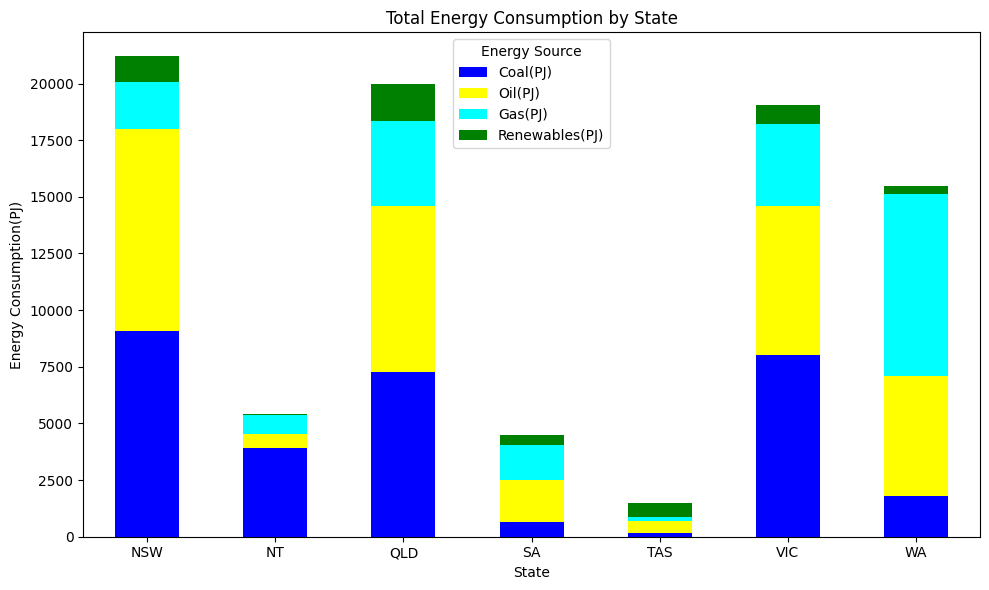

In [ ]:
# Group by 'State' and sum up energy consumption across different sources
energy_consumption = df.groupby('State')[['Coal(PJ)','Oil(PJ)','Gas(PJ)','Renewables(PJ)' ]].sum()

# Define a color list for different fuel types
colors = ['blue', 'yellow', 'aqua', 'green']

# Visualize total energy consumption for each state
ax = energy_consumption.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors)

# Customize the plot further (optional)
plt.title('Total Energy Consumption by State')
plt.xlabel('State')
plt.ylabel('Energy Consumption(PJ)')
plt.xticks(rotation=0)
plt.legend(title='Energy Source')
plt.tight_layout()

plt.show()


### **Discussion**
: The stacked bar chart displays the total energy consumption for each state, broken down by four fuel types: coal, oil, gas, and renewables. Each bar represents a state, with segments of the bar color-coded to show the contribution of each fuel type to the state's total energy consumption. The stacked bar chart helps identify the energy consumption trends and dependencies of each state.  States with high coal usage (NSW, VIC) may need targeted policies to transition towards cleaner energy sources. TAS serves as a model for renewable energy adoption, providing insights for other states aiming to increase their renewable energy share.

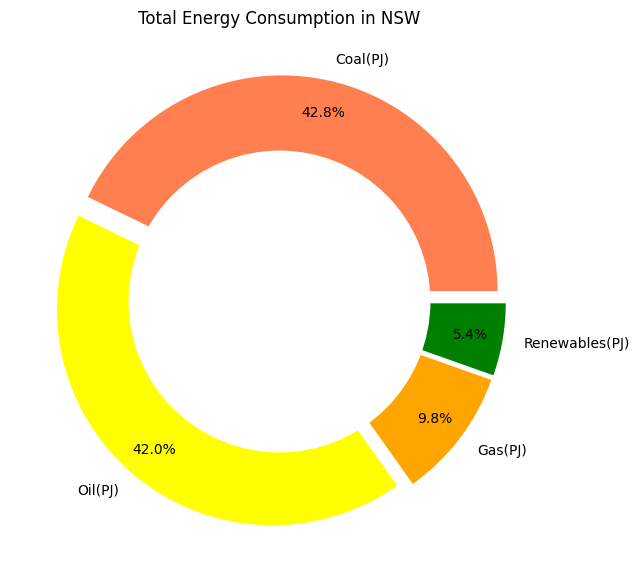

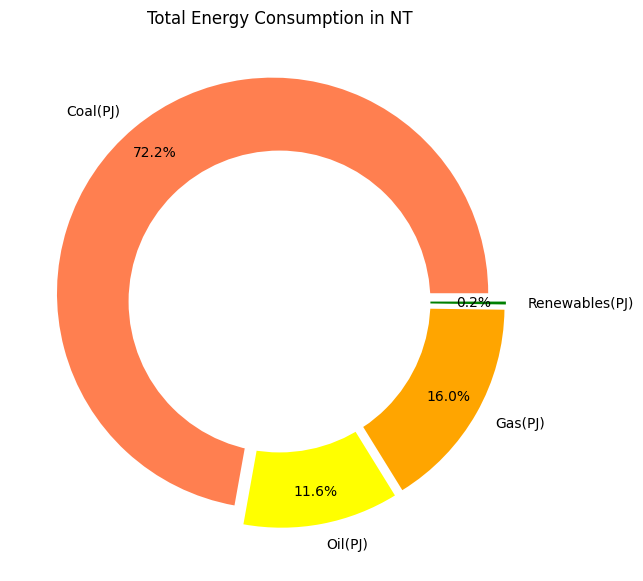

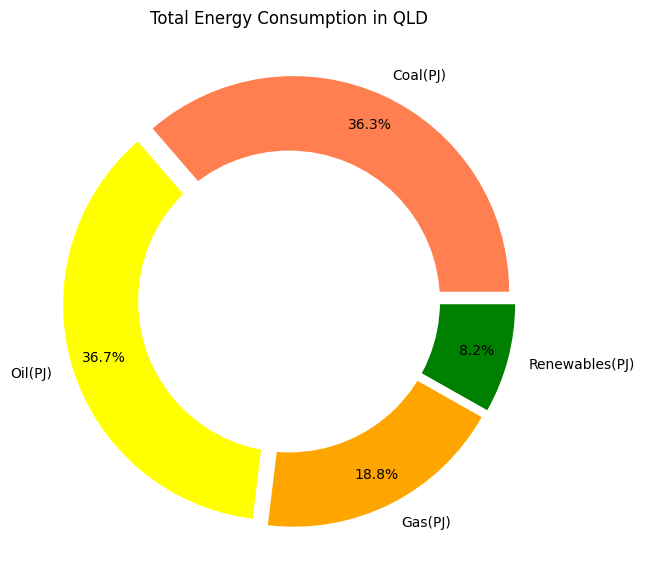

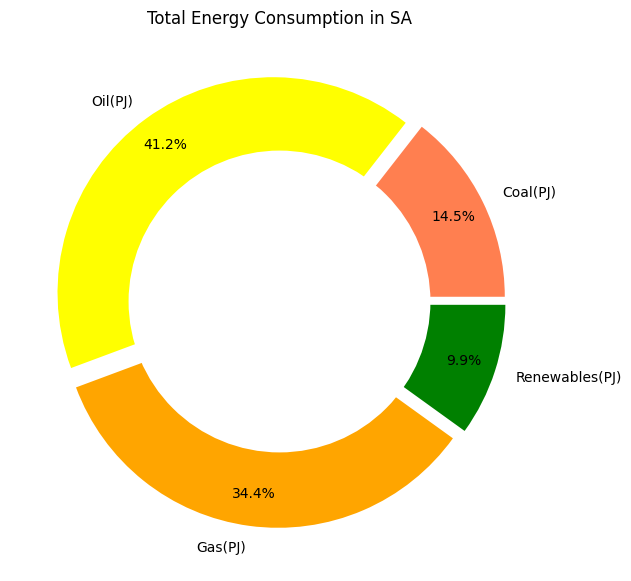

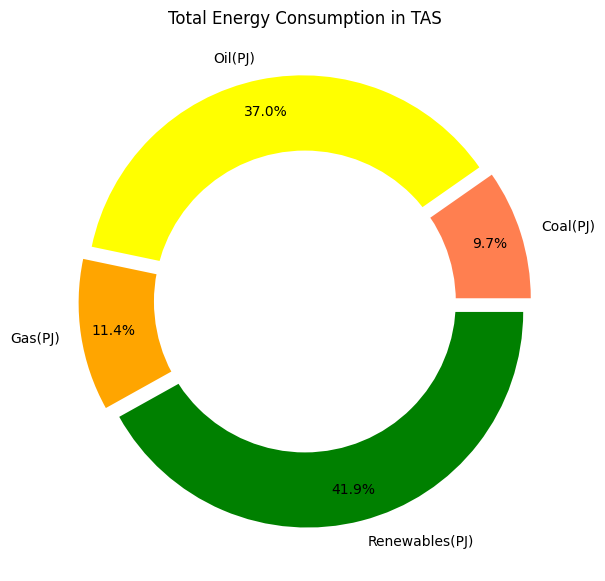

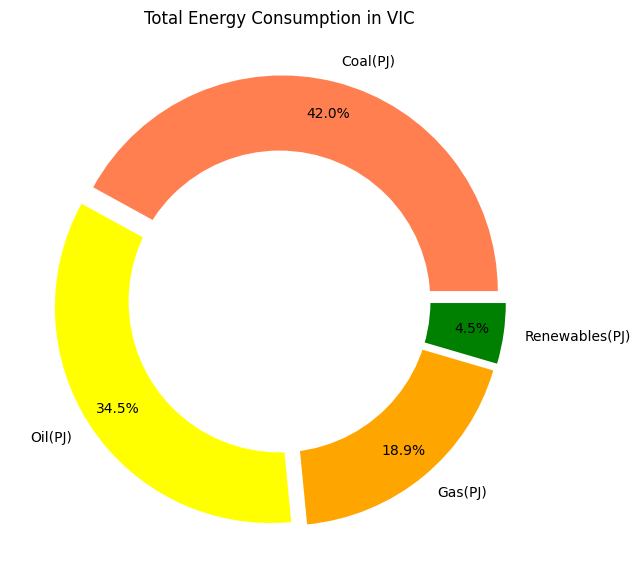

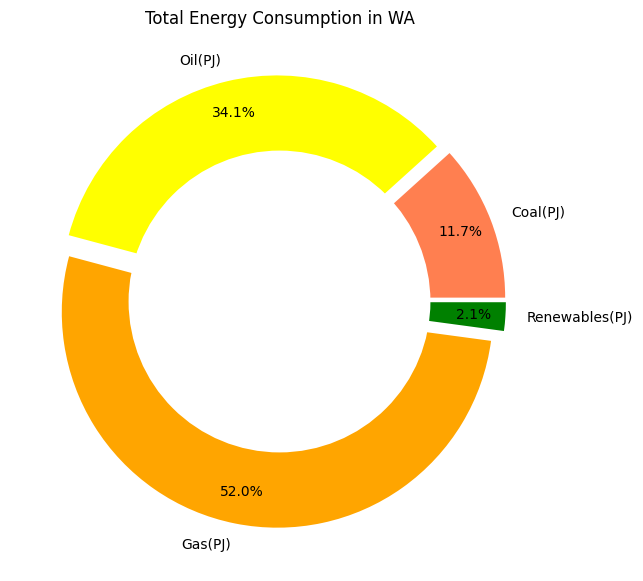

In [ ]:
# Define a color list for different fuel types
colors = ['coral', 'yellow', 'orange', 'green']

# Loop through each state (row) in the grouped data
for state, row in energy_consumption.iterrows():
    # Extract fuel types and their consumption values
    fuel_types = row.index.tolist()  # Convert index to list using .tolist()
    consumption_values = row.to_numpy()

    # Create a new figure for each state's doughnut chart
    plt.figure(figsize=(7, 7))

    # Define explode to separate the slices a bit
    explode = [0.05] * len(fuel_types)

    # Create pie chart
    plt.pie(consumption_values, colors=colors, labels=fuel_types,
            autopct='%1.1f%%', pctdistance=0.85, explode=explode)

    # Draw circle for doughnut chart
    centre_circle = plt.Circle((0, 0), 0.70, fc='white')
    fig = plt.gcf()

    # Adding Circle in Pie chart
    fig.gca().add_artist(centre_circle)

    # Adding Title of chart
    plt.title(f'Total Energy Consumption in {state}')

    # Display the doughnut chart for the current state
    plt.show()

### **Discussion**
: The doughnut charts offer a detailed breakdown of the energy consumption by fuel type for each state.
Each chart represents a specific state and shows the proportion of coal, oil, gas, and renewables in the total energy consumption.
The doughnut charts provide a clear and immediate understanding of each state's energy profile. This visualization aids in pinpointing specific areas where states can focus their efforts to improve energy efficiency and increase the adoption of renewable energy sources.
States with high fossil fuel consumption can use this data to formulate strategic plans to reduce their environmental impact and transition to cleaner energy.

The next time, I would like to add more varied and educational statistics visuals by using the Seaborn library. I can also see how merging features in Seaborn can improve already-existing Matplotlib charts.

Source : https://www.geeksforgeeks.org/donut-chart-using-matplotlib-in-python/

# **Group A**
 2. Compute and visualize the total energy consumption by fuel type.

 This report provides a detailed analysis of the total energy consumption by fuel type across different years in Australia. Two types of visualizations were created to present the data: a stacked bar chart and pie charts for each year.

In [ ]:
energy_consumption1

,Year,Coal(PJ),Oil(PJ),Gas(PJ),Renewables(PJ)
0,2008-09,2629.2,2000.8,1252.8,240.0
1,2009-10,2503.1,2058.1,1258.0,282.7
2,2010-11,2402.2,2212.0,1274.2,294.7
3,2011-12,2353.0,2184.2,1338.6,293.8
4,2012-13,2209.2,2278.0,1376.5,333.5
5,2013-14,2124.1,2297.2,1383.8,344.4
6,2014-15,2185.5,2236.7,1407.0,347.6
7,2015-16,2233.1,2279.5,1440.3,360.2
8,2016-17,2208.4,2318.0,1477.7,379.1
9,2017-18,2125.6,2404.0,1534.5,382.5


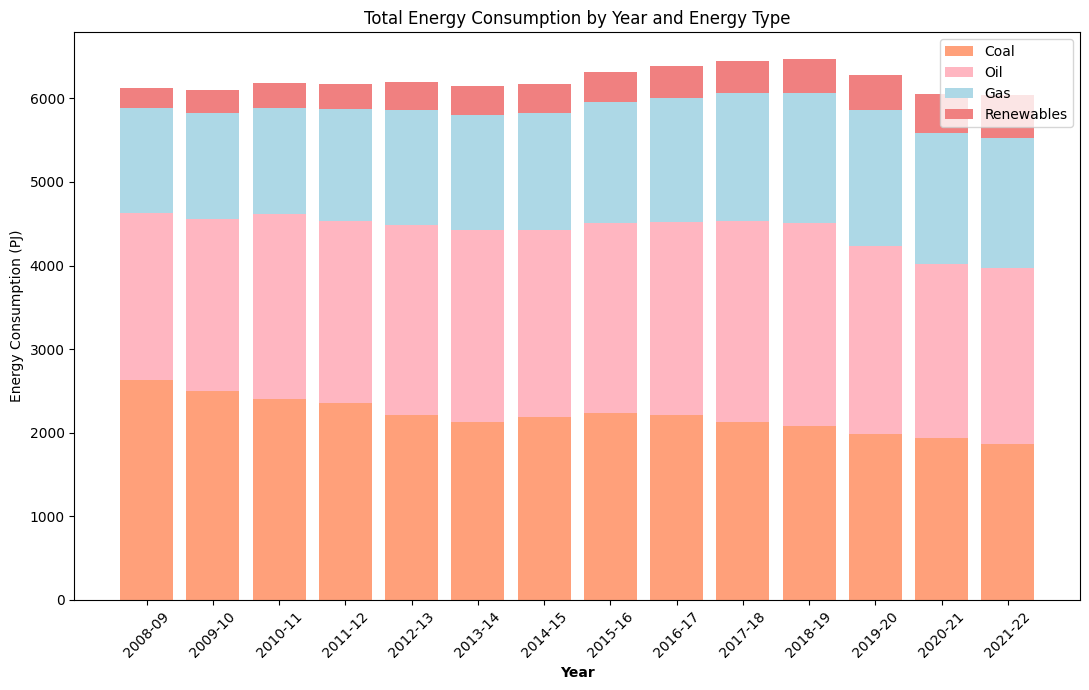

In [ ]:
# Group by year and sum the values for each fuel type
grouped_by_year = df.groupby('Year').sum().reset_index()

# Plot the stacked bar chart
fig, ax = plt.subplots(figsize=(11, 7))

# Define the x-axis (years)
years = grouped_by_year['Year']

# Plot the stacked bars
ax.bar(years, grouped_by_year['Coal(PJ)'], color='lightsalmon', label='Coal')
ax.bar(years, grouped_by_year['Oil(PJ)'], bottom=grouped_by_year['Coal(PJ)'], color='lightpink', label='Oil')
ax.bar(years, grouped_by_year['Gas(PJ)'], bottom=grouped_by_year['Coal(PJ)'] + grouped_by_year['Oil(PJ)'],
       color='lightblue', label='Gas')
ax.bar(years, grouped_by_year['Renewables(PJ)'],
       bottom=grouped_by_year['Coal(PJ)'] + grouped_by_year['Oil(PJ)'] + grouped_by_year['Gas(PJ)'],
       color='lightcoral', label='Renewables')

# Add labels and title
ax.set_xlabel('Year', fontweight='bold')
ax.set_ylabel('Energy Consumption (PJ)')
ax.set_title('Total Energy Consumption by Year and Energy Type')
ax.legend()

# Display the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### **Discussion**

: The stacked bar chart displays the total energy consumption by year, segmented by four fuel types: coal, oil, gas, and renewables.
Each bar represents a year, with segments of the bar color-coded to show the contribution of each fuel type to the year's total energy consumption. The stacked bar chart provides a comprehensive view of how energy consumption by fuel type has evolved over time. The evolution of overall energy consumption from 2008 to 2022 can be quickly seen, with gas and renewable energy sources rising and coal's proportion gradually declining. It is evident that since 2020, the overall amount of energy consumed has somewhat dropped.

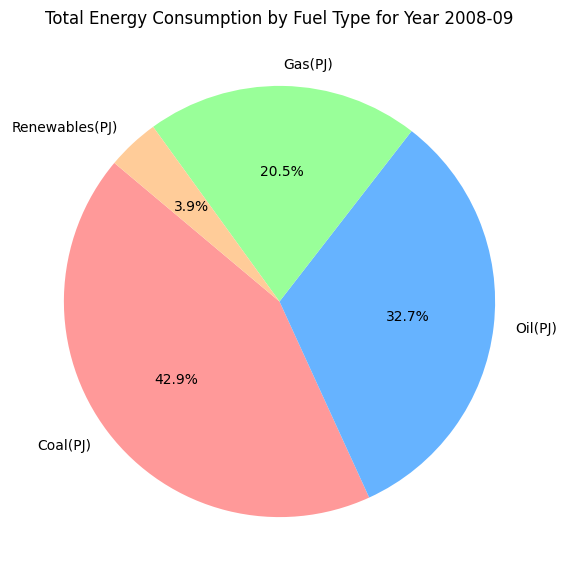

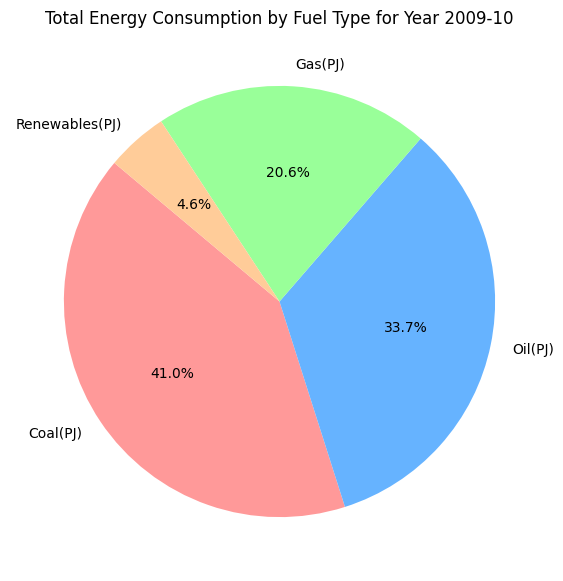

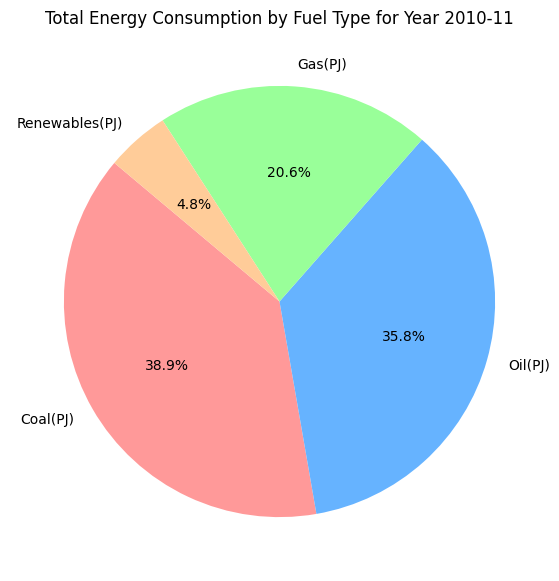

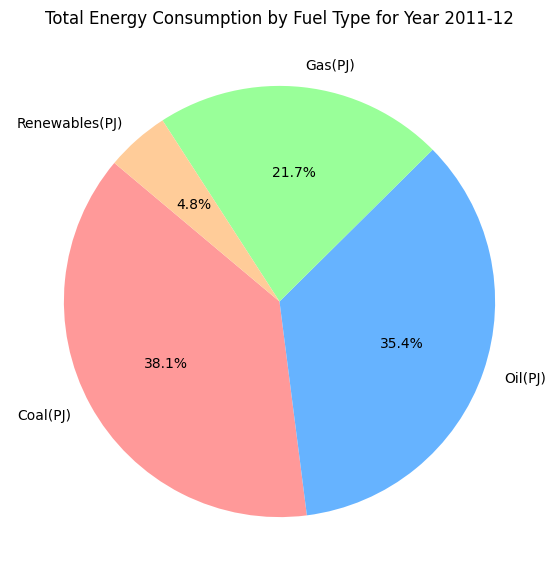

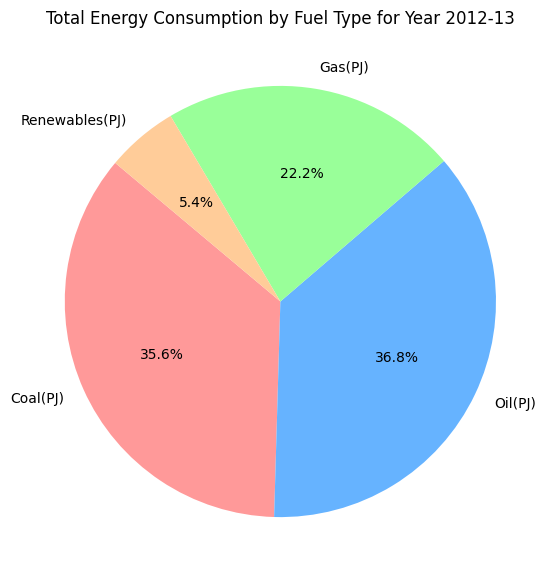

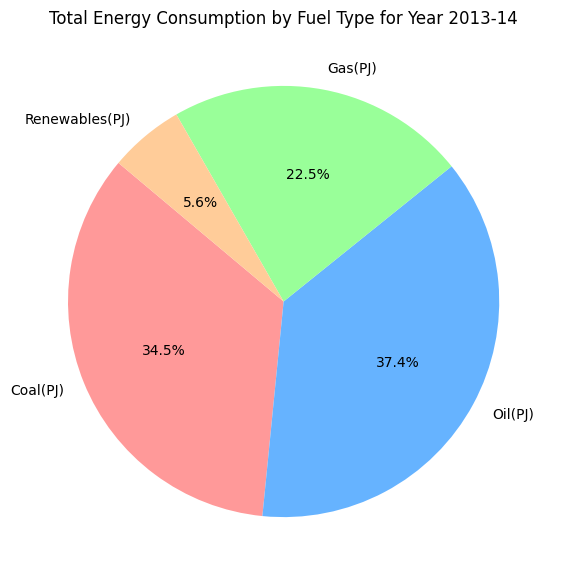

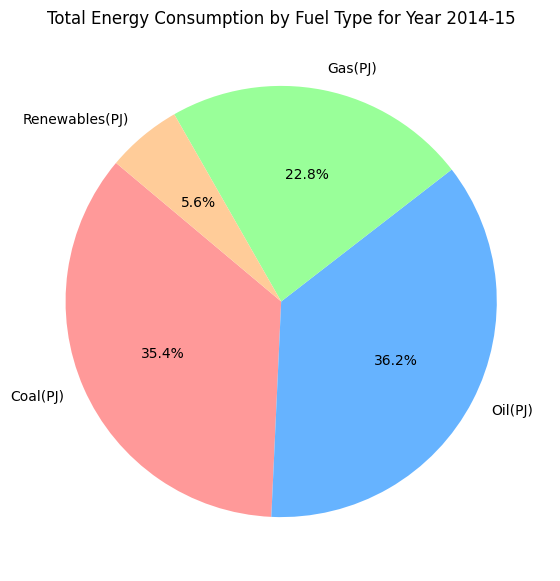

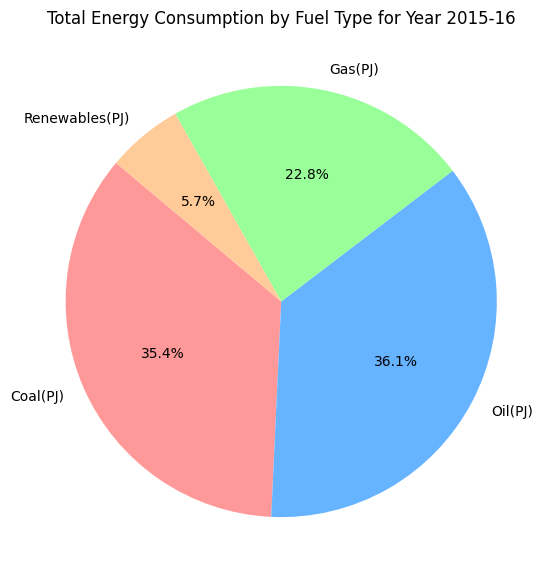

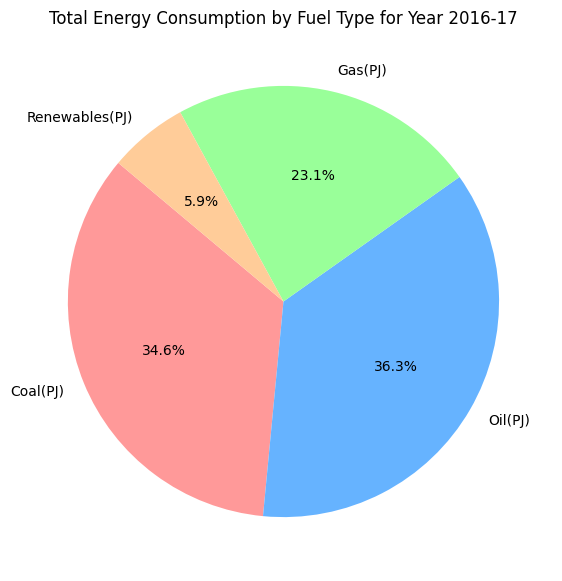

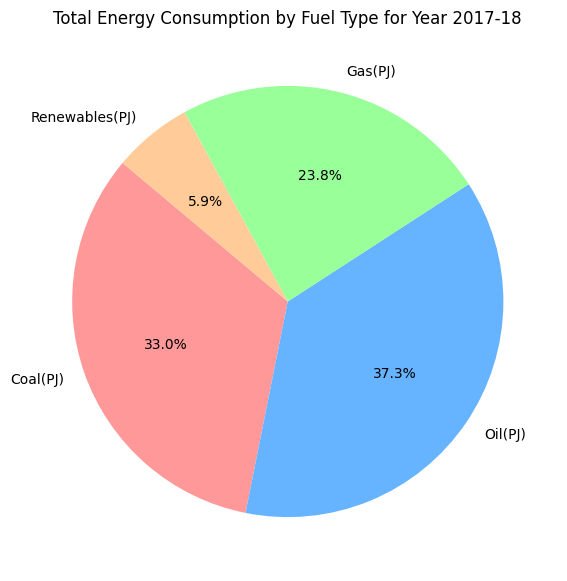

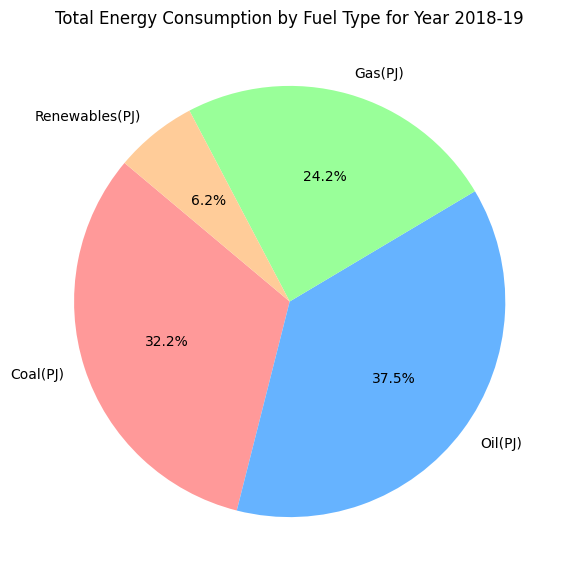

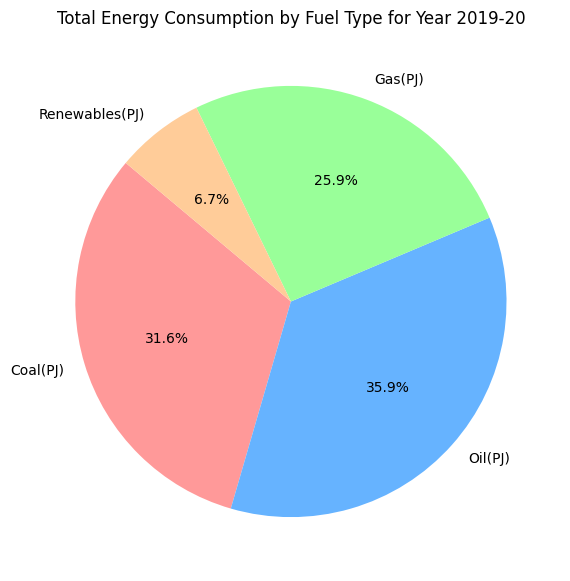

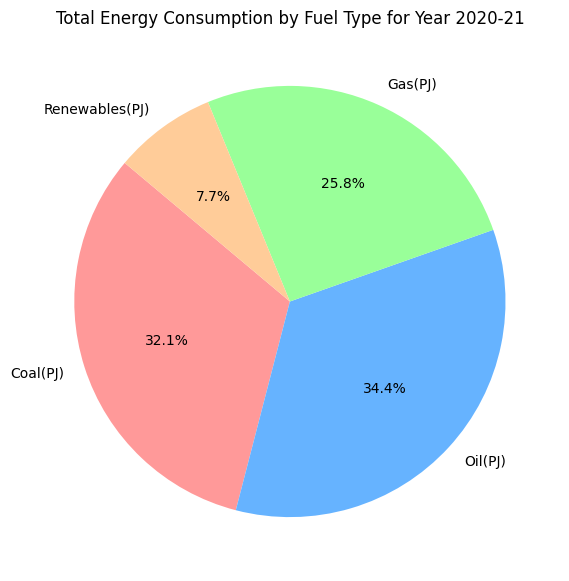

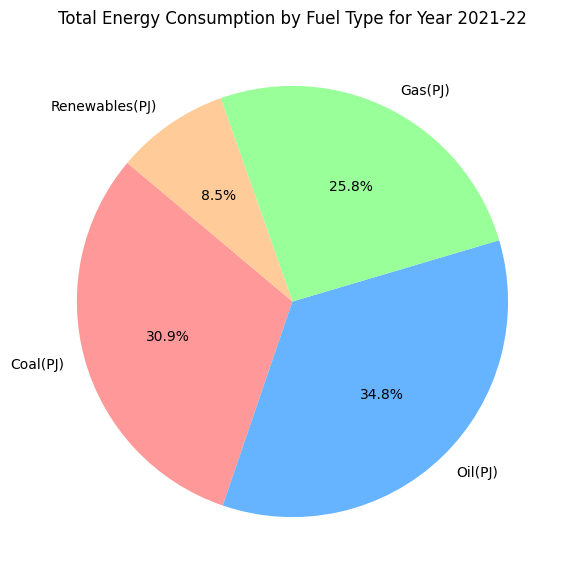

In [ ]:
# Define a custom pastel color palette
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

# Group by year and sum the energy consumption for each fuel type
total_energy_by_year = energy_consumption2.groupby('Year')[['Coal(PJ)', 'Oil(PJ)', 'Gas(PJ)', 'Renewables(PJ)']].sum()

# Plot a pie chart for each year
for year, row in total_energy_by_year.iterrows():
    plt.figure(figsize=(7, 7))
    plt.pie(row, labels=row.index, autopct='%1.1f%%', startangle=140, colors=colors)
    plt.title(f'Total Energy Consumption by Fuel Type for Year {year}')
    plt.show()

### **Discussion**

: The pie charts offer a snapshot of the energy consumption proportions by fuel type for each year. Each chart represents a specific year and shows the percentage share of coal, oil, gas, and renewables in the total energy consumption. The combined use of stacked bar charts and pie charts offers a comprehensive view of the total energy consumption by fuel type in Australia over the years. These visualizations provide valuable insights into the trends, proportions, and shifts in energy consumption patterns.

The next time, I would want to illustrate it with an area map showing the total amount of fuel used for each fuel type over time.

# **Group B**

5. Analyse and visualise the total energy consumption for each state, broken down by fuel type.

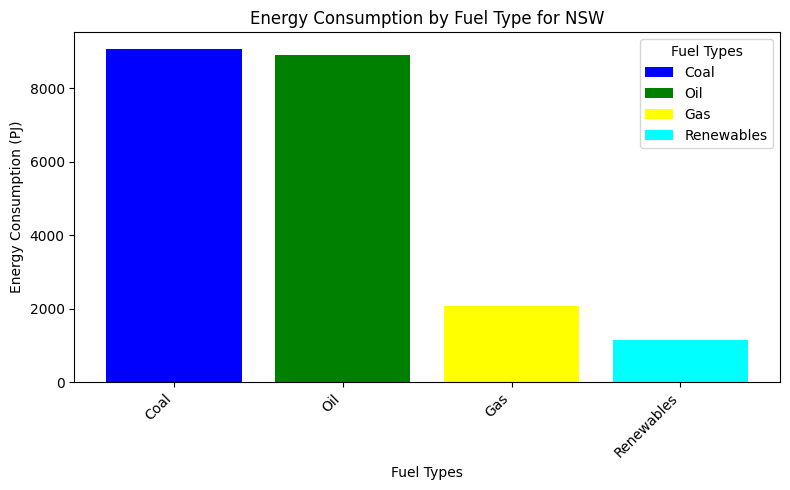

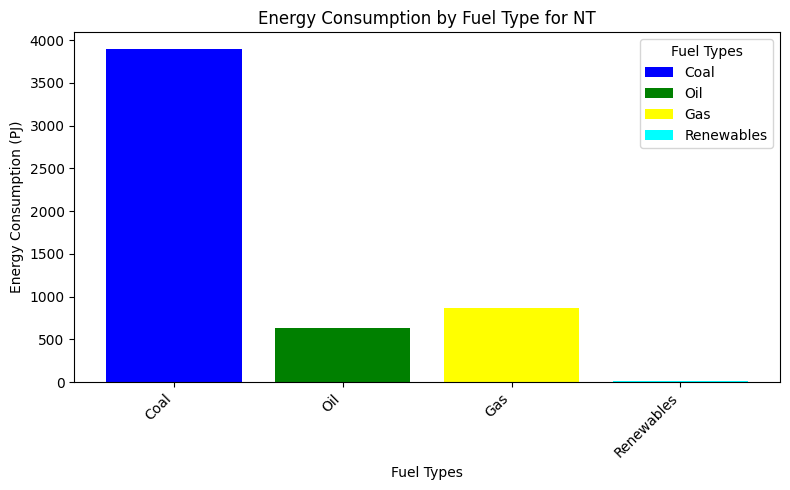

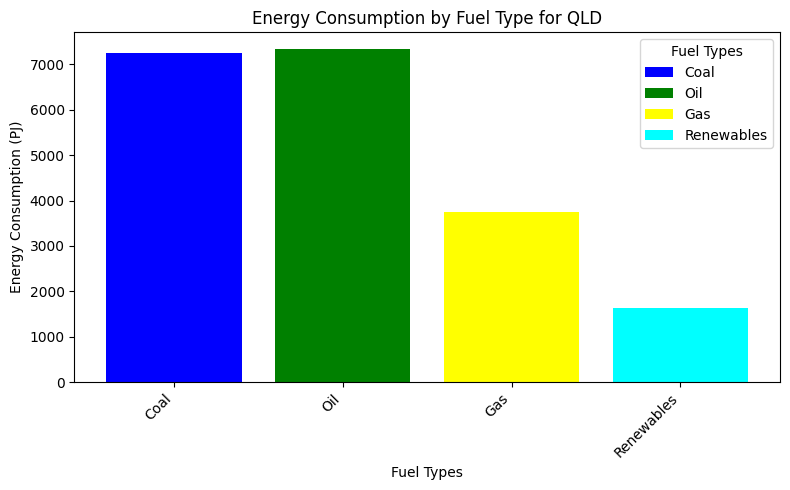

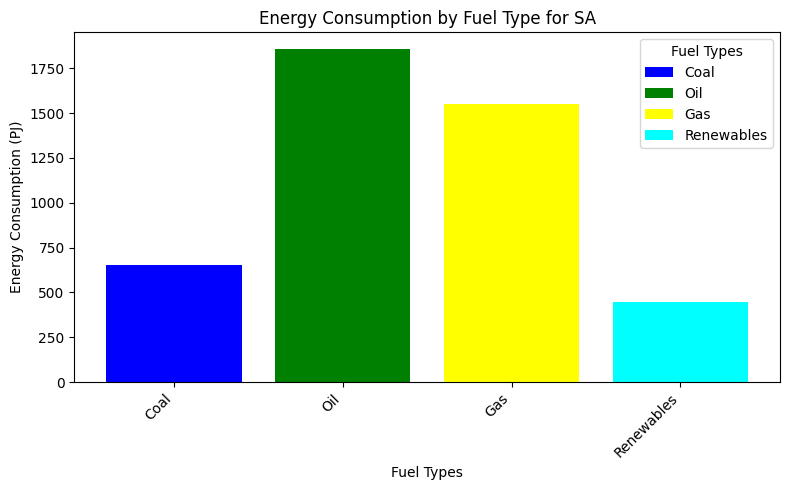

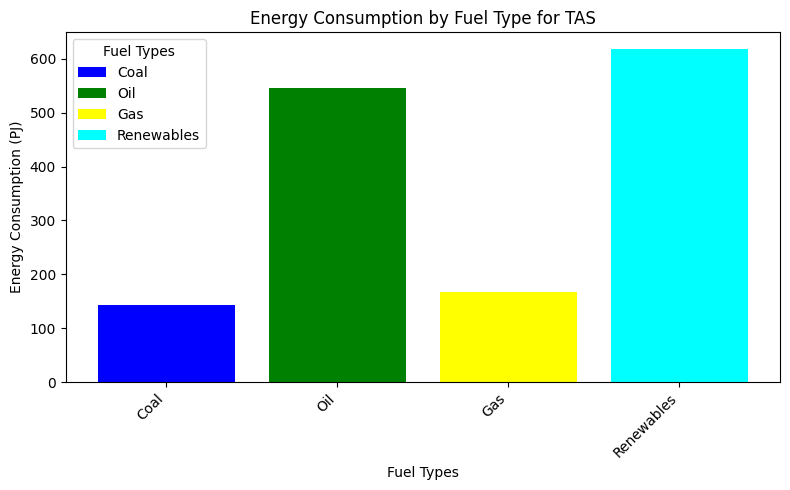

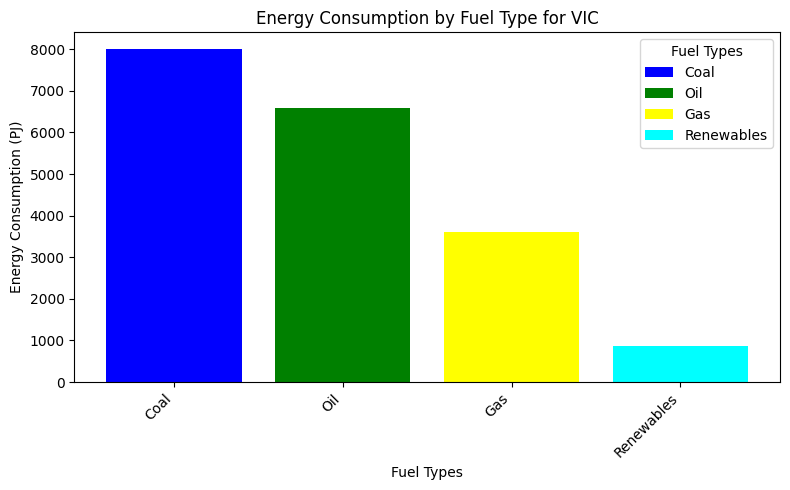

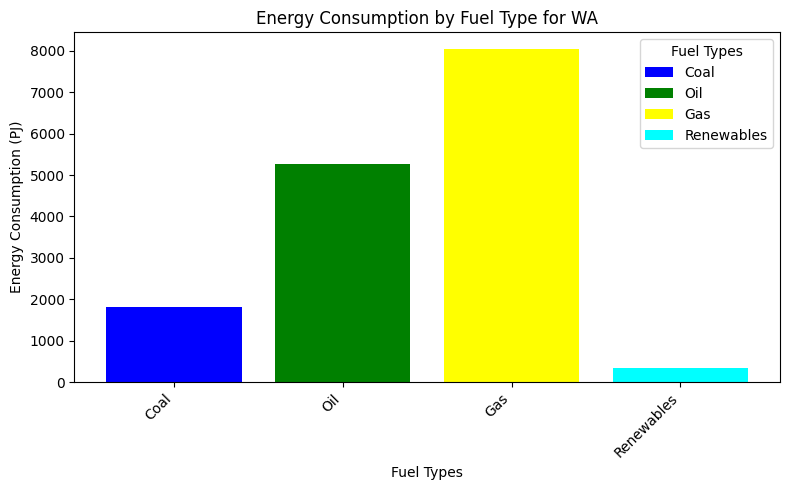

In [ ]:
# Calculate consumption by state
energy_consumption = df.groupby('State')[['Coal(PJ)', 'Oil(PJ)', 'Gas(PJ)', 'Renewables(PJ)']].sum()

# Reset index to view data by state
energy_consumption = energy_consumption.reset_index()

# Iterate through each state to create bar graphs for each energy type
for state in energy_consumption['State'].unique():
    state_data = energy_consumption[energy_consumption['State'] == state]

    # Creating Bar Charts
    plt.figure(figsize=(8, 5))

    # Drawing Bars
    plt.bar('Coal', state_data['Coal(PJ)'].values[0], color='blue', label='Coal')
    plt.bar('Oil', state_data['Oil(PJ)'].values[0], color='green', label='Oil')
    plt.bar('Gas', state_data['Gas(PJ)'].values[0], color='yellow', label='Gas')
    plt.bar('Renewables', state_data['Renewables(PJ)'].values[0], color='cyan', label='Renewables')

    plt.title(f'Energy Consumption by Fuel Type for {state}')
    plt.xlabel('Fuel Types')
    plt.ylabel('Energy Consumption (PJ)')

    # Ensure all bars are included in the legend
    plt.legend(title='Fuel Types')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

    # Display graphics or save as a picture
    plt.show()

### **Discussion**
: Among all states, NSW demonstrated the highest fuel consumptions for oil and air. Whereas, WA has the highest gas consumption. In contrast, TAS has the lowest consumption of coal, gas, and oil.

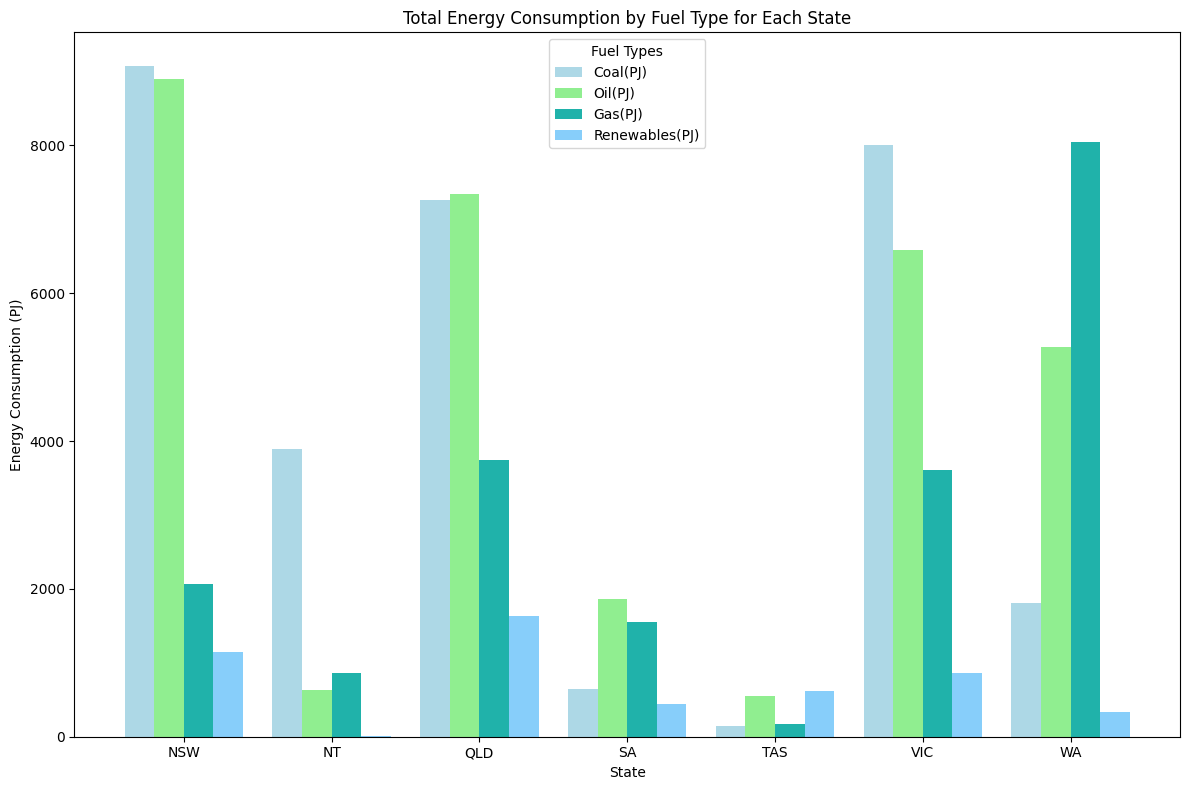

In [ ]:
# Define colors for the fuel types
colors = ['lightblue', 'lightgreen', 'lightseagreen', 'lightskyblue']

# Create a grouped bar chart
plt.figure(figsize=(12, 8))

# Number of states
num_states = len(energy_consumption['State'])
# Number of fuel types
num_fuels = len(energy_consumption.columns) - 1
# Position of bars on the x-axis
bar_width = 0.2
group_width = bar_width * num_fuels + 0.2
bar_positions = np.arange(num_states)

# Plot each fuel type
for i, (fuel, color) in enumerate(zip(['Coal(PJ)', 'Oil(PJ)', 'Gas(PJ)', 'Renewables(PJ)'], colors)):
    plt.bar(bar_positions + i * bar_width, energy_consumption[fuel], color=color, width=bar_width, label=fuel)

# Add title and labels
plt.title('Total Energy Consumption by Fuel Type for Each State')
plt.xlabel('State')
plt.ylabel('Energy Consumption (PJ)')
plt.xticks(bar_positions + bar_width * (num_fuels / 2 - 0.5), energy_consumption['State'])
plt.legend(title='Fuel Types')
plt.tight_layout()

# Show the plot
plt.show()

### **Discussion**
:

# **Group C**
### 4. Analyse the energy intensity, defined as energy consumption per unit of GSP, for each state annually and chart these figures

**I wasn't sure if I needed to plot the graphs separately or put each state's energy intensity in one line graph, so I made both**

This problem is to analyze the annual energy intensity of each state and draw related graphs. According to the assignment requirements, energy intensity is equal to energy consumption divided by DSP.there is no colum called"energy intensity",it need to be calculated by the formula below:

energy intensity(PJ/milliom)=energy consumption(PJ)/GSP(million)

input=energy intensity(PJ/million)

output=broken line graph

source: 1. https://www.geeksforgeeks.org/python-pandas-pivot_table/?ref=header_search

source: 2.chatgpt



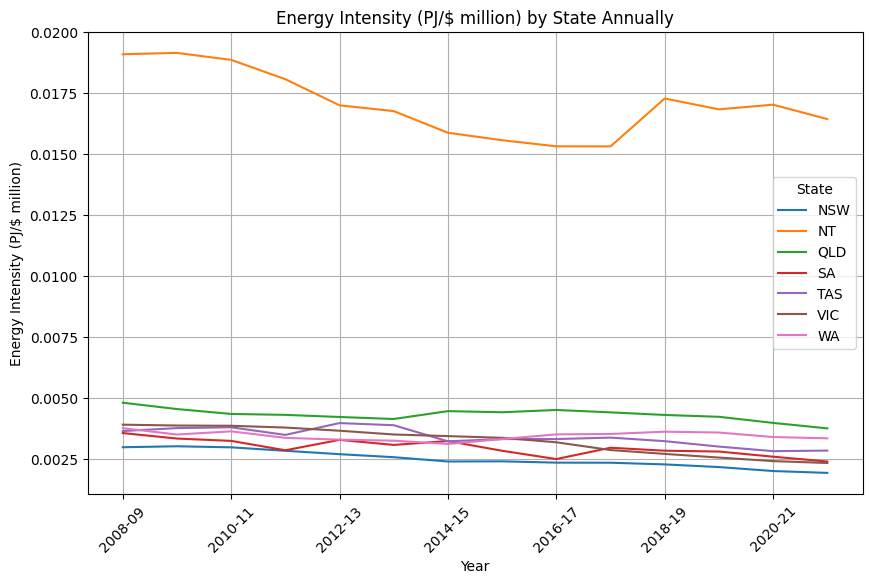

In [ ]:
# Define new energy consumption columns
energy_columns = ['Coal(PJ)', 'Oil(PJ)', 'Gas(PJ)', 'Renewables(PJ)']

# Calculate annual energy consumption
df['Total_Energy_Consumption'] = df[energy_columns].sum(axis=1)

# Group by State and Year to calculate total energy consumption and mean GSP
grouped = df.groupby(['State', 'Year']).agg({
    'Total_Energy_Consumption': 'sum',
    'GSP($ milion)': 'mean'
}).reset_index()

# Calculate energy intensity
grouped['Energy_Intensity'] = grouped['Total_Energy_Consumption'] / grouped['GSP($ milion)']

# Pivot the data for plotting
pivot_table = grouped.pivot(index='Year', columns='State', values='Energy_Intensity')

# Plotting
plt.figure(figsize=(10, 6))
pivot_table.plot(ax=plt.gca())
# Give title
plt.title('Energy Intensity (PJ/$ million) by State Annually')
# Give x-axis
plt.xlabel('Year')
# Give y-axis
plt.ylabel('Energy Intensity (PJ/$ million)')
plt.xticks(rotation=45)
plt.legend(title='State')
plt.grid(True)
plt.show()


### **Discussion**
:

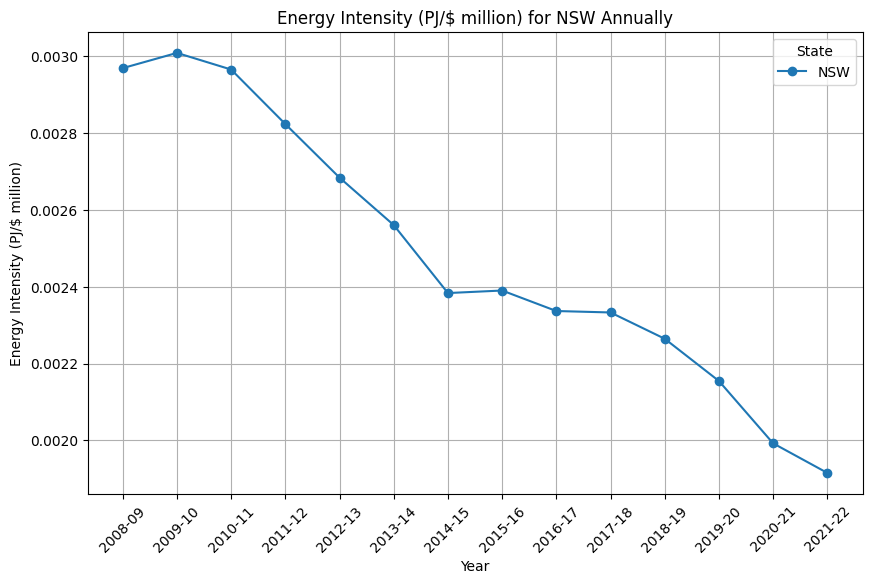

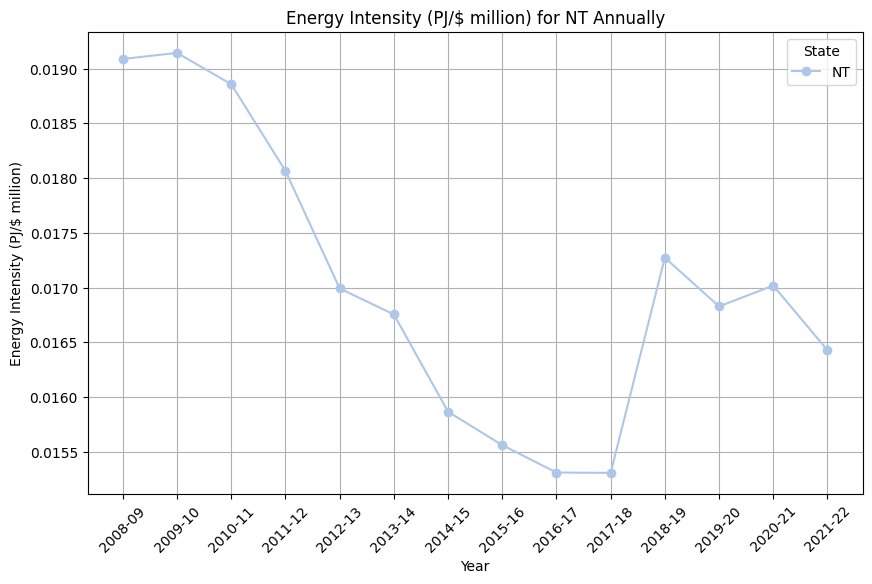

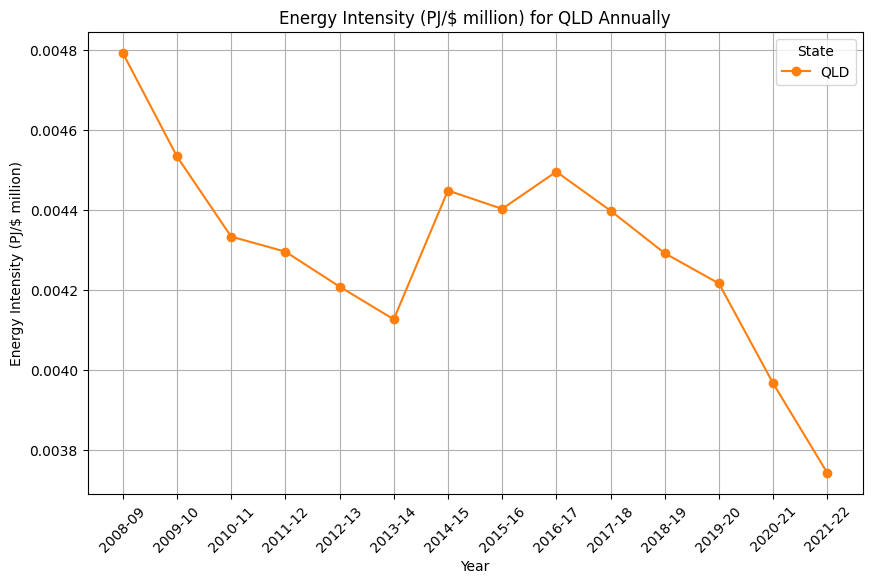

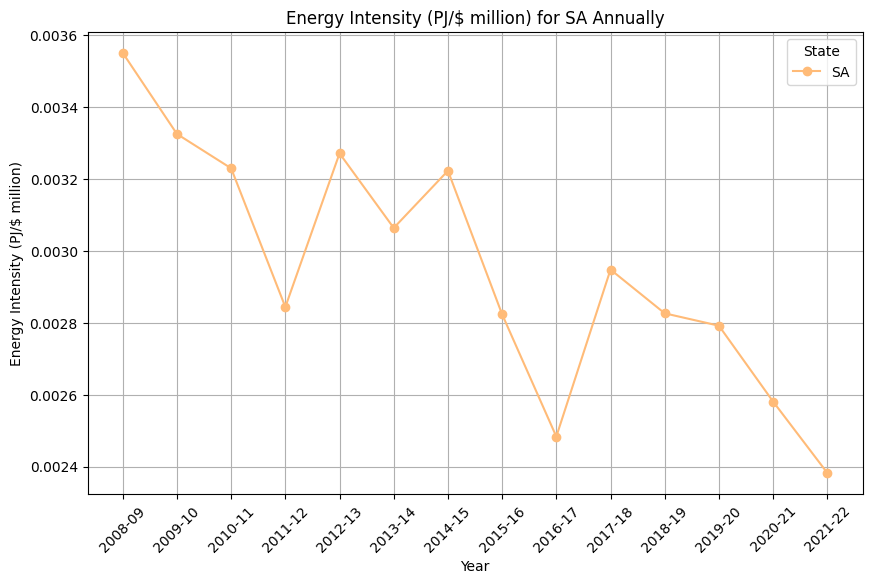

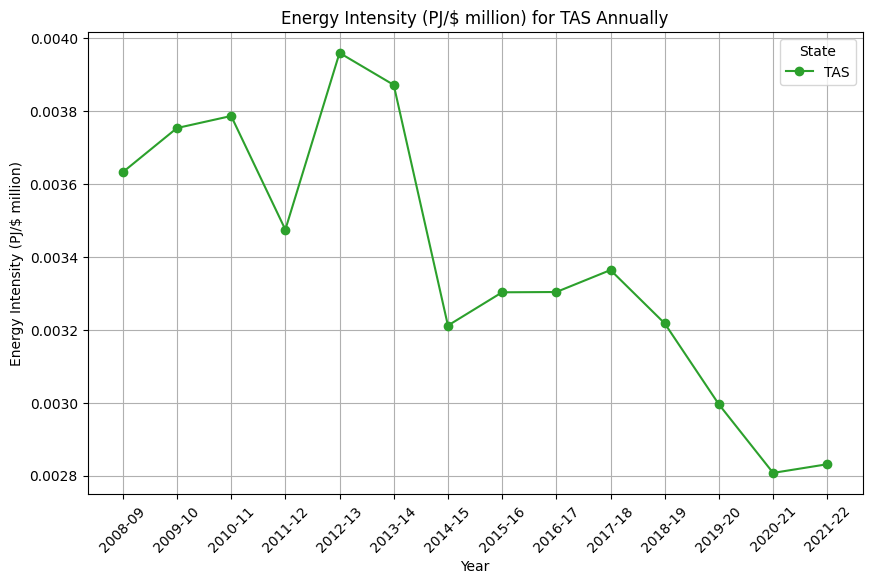

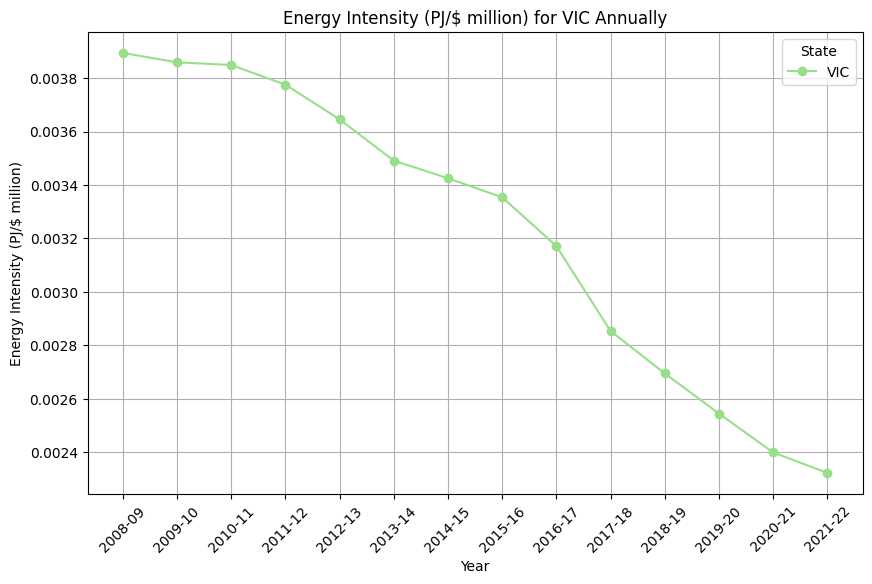

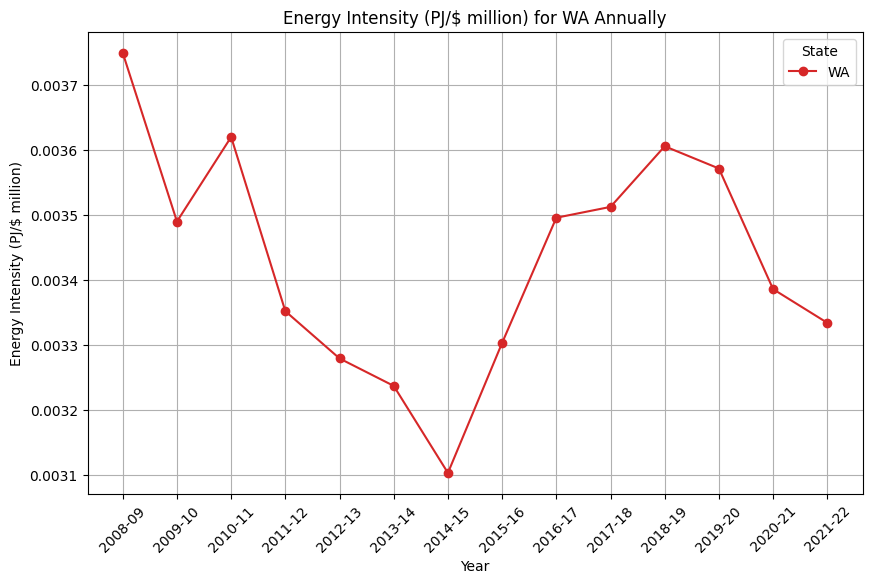

In [ ]:
# Define new energy consumption columns
energy_columns = ['Coal(PJ)', 'Oil(PJ)', 'Gas(PJ)', 'Renewables(PJ)']

# Calculate annual energy consumption
df['Total_Energy_Consumption'] = df[energy_columns].sum(axis=1)

# Group by State and Year to calculate total energy consumption and mean GSP
grouped = df.groupby(['State', 'Year']).agg({
    'Total_Energy_Consumption': 'sum',
    'GSP($ milion)': 'mean'
}).reset_index()

# Calculate energy intensity
grouped['Energy_Intensity'] = grouped['Total_Energy_Consumption'] / grouped['GSP($ milion)']

# Generate a list of states
states = grouped['State'].unique()

# Define a color map
color_map = plt.get_cmap('tab20')

# Use a loop function to draw a line chart of energy intensity in each state
for idx, state in enumerate(states):
    state_data = grouped[grouped['State'] == state]

    plt.figure(figsize=(10, 6))
    plt.plot(state_data['Year'], state_data['Energy_Intensity'], marker='o', color=color_map(idx), label=state)

    plt.title(f'Energy Intensity (PJ/$ million) for {state} Annually')
    plt.xlabel('Year')
    plt.ylabel('Energy Intensity (PJ/$ million)')
    plt.xticks(rotation=45)
    plt.legend(title='State')
    plt.grid(True)
    plt.show()

### **Discussion**
Energy intensity has generally decreased across states, but the changes have been minimal. This suggests that while there has been some improvement in energy efficiency, the progress has been slow.Exhibits little change in energy intensity, indicating stability in energy consumption and economic output patterns.To achieve more significant improvements in energy efficiency, states need to adopt more aggressive measures and strategies. With sustained efforts, it is possible to reduce energy consumption while promoting sustainable economic growth.









### Gen AI prompt:
Explain the function of pivot function,Explain the function of pivot function and how to write it into my code

We drew the code according to the instructor, but an error was reported, so I asked chatgpt and it gave me this line of code.

### chatgpt give answer:
pivot_table.plot: This generates a plot from the pivot table.

ax=plt.gca(): This parameter specifies the axes on which to plot. plt.gca() stands for "get current axes," which returns the current axes instance on the current figure.
code show as below:


In [ ]:
Pivot the data for plotting
pivot_table = grouped.pivot(index='Year', columns='State', values='Energy_Intensity')

Plotting
plt.figure(figsize=(10, 6)) pivot_table.plot(ax=plt.gca())`

# Interpretation of Results

# Recommendations and Limitations

Recommendations:

Develop national plan: Each state should create a plan to reduce coal reliance and increase renewable energy use. This includes investing in renewables, offering incentives, and upgrading infrastructure.
Diversify energy mix: All states should aim for a balanced energy portfolio, considering hybrid projects, grid improvements, and regulatory reforms.
Maximize natural gas potential: WA should integrate renewables while
leveraging existing infrastructure for potential green hydrogen exports.
Promote renewable leadership: Tasmania can share knowledge and collaborate
with other states on projects and grid connections.
National policy framework: All states should adopt policies like carbon pricing, energy efficiency standards, and public awareness campaigns.
Enhance data transparency: Improve data collection and accessibility
through platforms, regular reporting, and smart metering.
Long-term planning: Set clear goals for emissions reduction and renewable energy targets for 2030 and 2050. Foster interstate coordination.
Address unique challenges: SA and NT should develop customized solutions considering their specific conditions and engage with indigenous communities.

Limitations :

Doesn't delve into specific costs or timelines for implementation.
May not address all potential challenges or opportunities within each state.
Relies on successful national policy framework development and implementation.

# Conclusion

# References

Bibliography

Rahman, Md Geaur and Md Zahidul Islam. 2016. "Missing Value Imputation using a Fuzzy Clustering-Based EM Approach." Knowledge and Information Systems 46 (2) (02): 389-422. doi:https://doi.org/10.1007/s10115-015-0822-y. https://www.proquest.com/scholarly-journals/missing-value-imputation-using-fuzzy-clustering/docview/1757515869/se-2.

Agbehadji, Israel Edem, Richard C. Millham, Simon James Fong, and Hongji Yang. 2018. "Bioinspired Computational Approach to Missing Value Estimation." Mathematical Problems in Engineering 2018: 16. doi:https://doi.org/10.1155/2018/9457821. https://www.proquest.com/scholarly-journals/bioinspired-computational-approach-missing-value/docview/1988139805/se-2.

Source : https://ourworldindata.org/energy-production-consumption

Source : https://www.forbes.com/sites/rrapier/2023/08/06/global-energy-trends-insights-from-the-2023-statistical-review-of-world-energy/?sh=392702d03502